Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, w]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


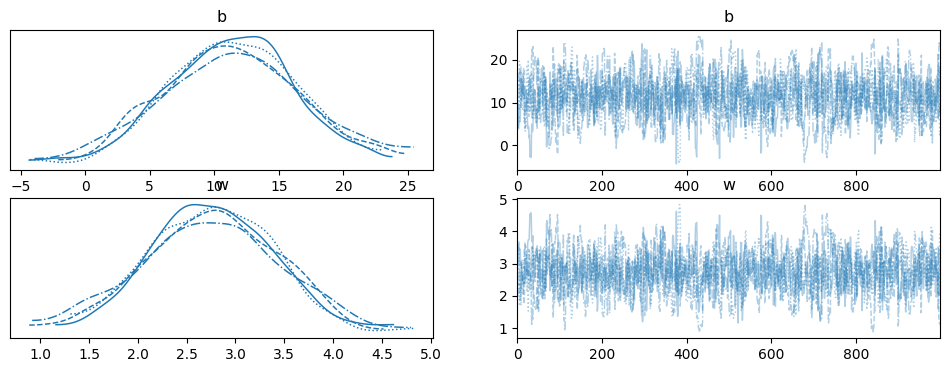

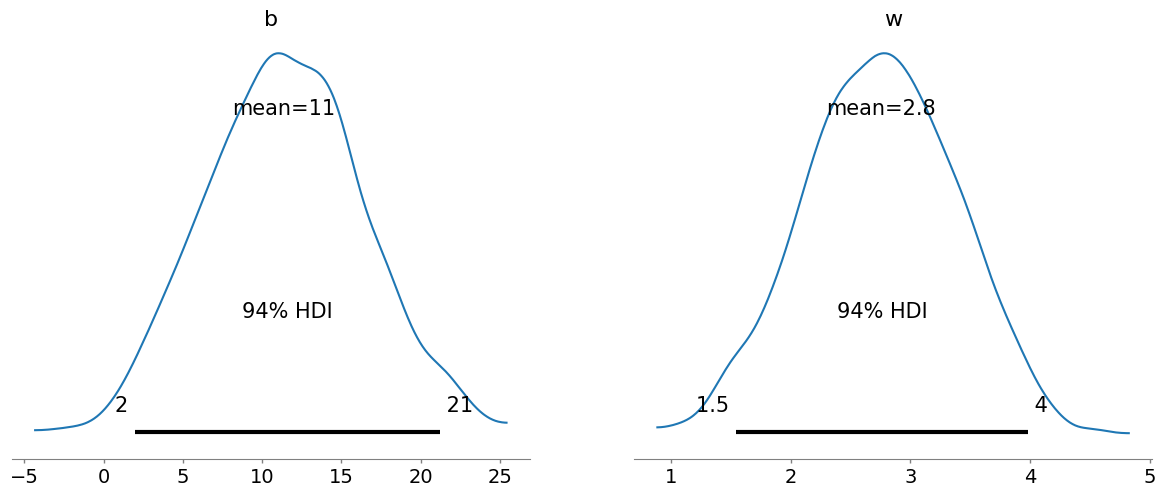

In [3]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# generate data point
xs = np.random.random(size=3) * 10
ys = 3 * xs + 10
noise = np.random.normal(size=3, loc=0, scale=2)
noised_ys = ys + noise

# define model
with pm.Model() as linear_model:
    # priors
    b = pm.Normal('b', mu=0, sigma=10)
    w = pm.Normal('w', mu=0, sigma=10)
    # likelihood
    obs = pm.Normal('obs', mu=b + w * xs, sigma=2, observed=noised_ys)
    # sampling
    trace = pm.sample(draws=1000, tune=1000) # tune is burn-in period
    # summarize
    az.plot_trace(trace)
    plt.show()
    az.plot_posterior(trace)
    plt.show()

In [4]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b,11.382,5.095,1.999,21.236,0.185,0.155,751.0,804.0,1.0
w,2.756,0.652,1.545,3.980,0.024,0.020,756.0,779.0,1.0
